In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
df = pd.read_csv('./Notebooks/data/pima-data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
df.shape

(768, 10)

In [13]:
df.isnull().values.any()

False

In [14]:
import seaborn as sns

<AxesSubplot:>

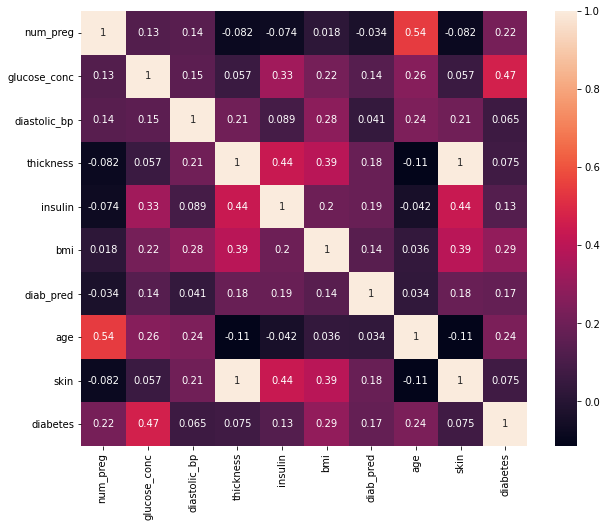

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [20]:
df[['skin','thickness']].corr() # highly correlated

,skin,thickness
skin,1.0,1.0
thickness,1.0,1.0


In [37]:
df.drop('skin',axis=1,inplace=True)

In [40]:
df['diabetes'] = df['diabetes'].map({True:1,False:0})

In [47]:
# Check True / False ratio , class distribution 
# rare events 

In [46]:
df['diabetes'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: diabetes, dtype: float64

In [48]:
# algorithm selection
# algorithm decision factor
    

In [58]:
from sklearn.model_selection import train_test_split

In [91]:
df.columns.tolist()[1:-1]

['glucose_conc',
 'diastolic_bp',
 'thickness',
 'insulin',
 'bmi',
 'diab_pred',
 'age']

In [92]:
X = df[df.columns.tolist()[1:-1]]
y = df[df.columns.tolist()[-1]]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [94]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: diabetes, dtype: float64

In [95]:
y_train.value_counts(normalize=True)

0    0.642458
1    0.357542
Name: diabetes, dtype: float64

In [96]:
y_test.value_counts(normalize=True)

0    0.670996
1    0.329004
Name: diabetes, dtype: float64

In [97]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [99]:
for i in df.columns.tolist():
    print(f"{i}: {len(df.loc[df[i]==0])}")

num_preg: 111
glucose_conc: 5
diastolic_bp: 35
thickness: 227
insulin: 374
bmi: 11
diab_pred: 0
age: 0
diabetes: 500


In [100]:
# derived reasonable missing values 

In [104]:
# from sklearn.preprocessing import Imputer 
from sklearn.impute import SimpleImputer

In [106]:
fill_0 = SimpleImputer(missing_values=0, strategy='mean')

In [108]:
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [109]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

In [110]:
nb_model.fit(X_train,y_train)

GaussianNB()